##Hi all as we know credit card fraud detection will have a imbalanced data i.e having more number of normal class than the number of fraud class

###In this I will use Basic method of handling imbalance data which are
 ** This all I have done by using Analytics Vidya's blog please find the link [Analytics Vidya](https://www.analyticsvidhya.com/blog/2017/03/read-commonly-used-formats-using-python/)  **

Undersampling:- it means taking the less number of majority class (In our case taking less number of Normal transactions so that our new data will be balanced

Oversampling: it means using replicating the data of minority class (fraud class) so that we can have a balanced data

SMOTE: it is also a type of oversampling but in this we will make the synthetic example of Minority data and will give as a balanced data

First I will start with the Undersampling and will try to classify using these Models
1. Decision Tree Classifier/ Random Forest Classifier

2. Logistic regression

3. SVM

4. XGboost

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

creditcard.csv



###Lets start with Importing Libraries and data

In [2]:
import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # to split the data
from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv("../input/creditcard.csv",header = 0)

####Now explore the data to get insight in it

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

1. Hence we can see there are 284,807 rows and 31 columns which is a huge data
2.  Time is also in float here mean it can be only seconds starting from a particular time

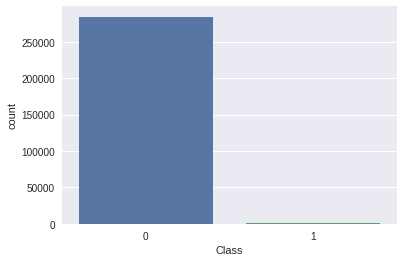

In [5]:
# Now lets check the class distributions
sns.countplot("Class",data=data)

1. As we know data is imbalanced and this graph also confirmed it 

In [6]:
# now let us check in the number of Percentage
Count_Normal_transacation = len(data[data["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(data[data["Class"]==1]) # fraud by 1
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of normal transacation is",Percentage_of_Normal_transacation*100)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of fraud transacation",Percentage_of_Fraud_transacation*100)

percentage of normal transacation is 99.82725143693798
percentage of fraud transacation 0.1727485630620034


1. Hence in data there is only 0.17 % are the fraud transcation while 99.83 are valid transcation
2. So now we have to do resampling of this data
3. before doing resampling lets have look at the amount related to valid transcation and fraud transcation

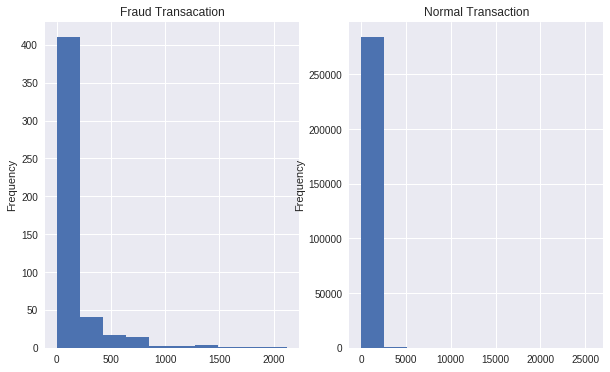

In [7]:
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")

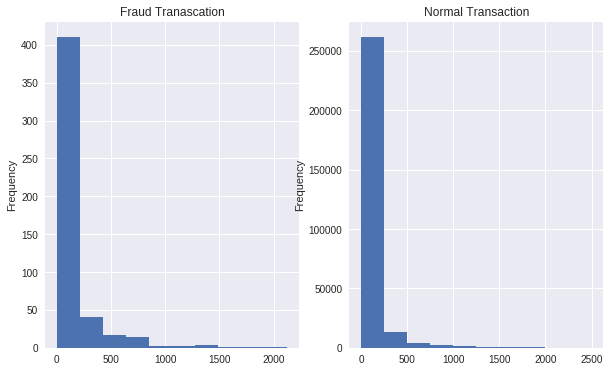

In [8]:
# the distribution for Normal transction is not clear and it seams that all transaction are less than 2.5 K
# So plot graph for same 
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2500].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2500].Amount.plot.hist(title="Normal Transaction")

1. Here now after exploring data we can say there is no pattern in data
2. Now lets start with resmapling of data

###ReSampling - Under Sampling

Before re sampling lets have look at the different accuracy matrices

Accuracy = TP+TN/Total

Precison = TP/(TP+FP)

Recall = TP/(TP+FN)

TP = True possitive means no of possitve cases which are predicted possitive

TN = True negative means no of negative cases which are predicted negative

FP = False possitve means no of negative cases which are predicted possitive

FN= False Negative means no of possitive cases which are predicted negative

Now for our case recall will be a better option because in these case no of normal transacations will be very high than the no of fraud cases and sometime a fraud case will be predicted as normal. So, recall will give us a sense of only fraud cases

Resampling

in this we will resample our data with different size

then we will try to use this resampled data to train our model

then we will use this model to predict for our original data

In [9]:
# for undersampling we need a portion of majority class and will take whole data of minority class
# count fraud transaction is the total number of fraud transaction
# now lets us see the index of fraud cases
fraud_indices= np.array(data[data.Class==1].index)
normal_indices = np.array(data[data.Class==0].index)
#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data
def undersample(normal_indices,fraud_indices,times):#times denote the normal data = times*fraud data
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    
    print("the normal transacation proportion is :",len(undersample_data[undersample_data.Class==0])/len(undersample_data[undersample_data.Class]))
    print("the fraud transacation proportion is :",len(undersample_data[undersample_data.Class==1])/len(undersample_data[undersample_data.Class]))
    print("total number of record in resampled data is:",len(undersample_data[undersample_data.Class]))
    return(undersample_data)

In [10]:
## first make a model function for modeling with confusion matrix
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))
    

In [11]:
def data_prepration(x): # preparing data for training and testing as we are going to use different data 
    #again and again so make a function
    x_features= x.ix[:,x.columns != "Class"]
    x_labels=x.ix[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [12]:
# before starting we should standridze our ampount column
data["Normalized Amount"] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data.drop(["Time","Amount"],axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Logistic Regression with Undersample Data

the undersample data for 1 proportion

the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984
------------------------------------------------------------

the model classification for 1 proportion

length of training data
688
length of test data
296

the recall for this model is : 0.897260273973
TP 131
TN 147
FP 3
FN 15


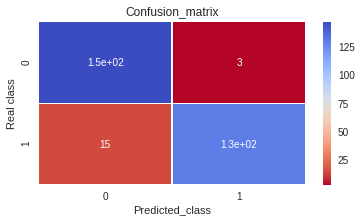


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.91      0.98      0.94       150
          1       0.98      0.90      0.94       146

avg / total       0.94      0.94      0.94       296

________________________________________________________________________________________________________
the undersample data for 2 proportion

the normal transacation proportion is : 0.6666666666666666
the fraud transacation proportion is : 0.3333333333333333
total number of record in resampled data is: 1476
------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443

the recall for this model is : 0.929078014184
TP 131
TN 296
FP 6
FN 10


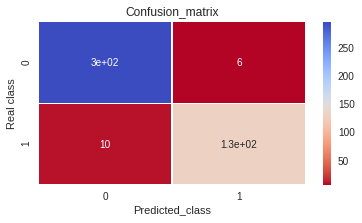


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.98      0.97       302
          1       0.96      0.93      0.94       141

avg / total       0.96      0.96      0.96       443

________________________________________________________________________________________________________
the undersample data for 3 proportion

the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968
------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591

the recall for this model is : 0.892086330935
TP 124
TN 446
FP 6
FN 15


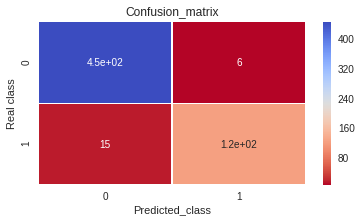


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       452
          1       0.95      0.89      0.92       139

avg / total       0.96      0.96      0.96       591

________________________________________________________________________________________________________


In [13]:
# Now make undersample data with differnt portion
# here i will take normal trasaction in  0..5 %, 0.66% and 0.75 % proportion of total data now do this for 
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    print()
    clf=LogisticRegression()
    model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")
    
# here 1st proportion conatain 50% normal transaction
#Proportion 2nd contains 66% noraml transaction
#proportion 3rd contains 75 % normal transaction

 1. As the number of normal transaction is increasing the recall for fraud transcation is decreasing
 2. TP = no of fraud transaction which are predicted fraud
 3.  TN = no. of normal transaction which are predicted normal
 4.  FP =  no of normal transaction which are predicted fraud
 5.  FN =no of fraud Transaction which are predicted normal

the undersample data for 1 proportion

the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984
------------------------------------------------------------

the model classification for 1 proportion

length of training data
688
length of test data
296
length of training data
199364
length of test data
85443

the recall for this model is : 0.923076923077
TP 132
TN 81568
FP 3732
FN 11


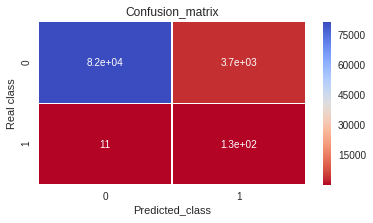


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85300
          1       0.03      0.92      0.07       143

avg / total       1.00      0.96      0.98     85443

_________________________________________________________________________________________
the undersample data for 2 proportion

the normal transacation proportion is : 0.6666666666666666
the fraud transacation proportion is : 0.3333333333333333
total number of record in resampled data is: 1476
------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443
length of training data
199364
length of test data
85443

the recall for this model is : 0.913333333333
TP 137
TN 84232
FP 1061
FN 13


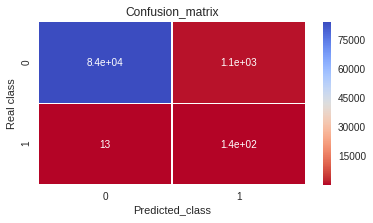


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85293
          1       0.11      0.91      0.20       150

avg / total       1.00      0.99      0.99     85443

_________________________________________________________________________________________
the undersample data for 3 proportion

the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968
------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591
length of training data
199364
length of test data
85443

the recall for this model is : 0.894366197183
TP 127
TN 84750
FP 551
FN 15


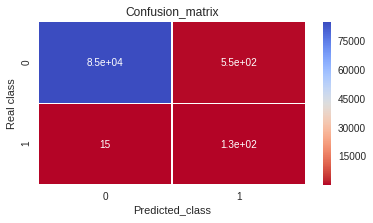


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85301
          1       0.19      0.89      0.31       142

avg / total       1.00      0.99      1.00     85443

_________________________________________________________________________________________


In [14]:
#let us train this model using undersample data and test for the whole data test set 
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(data) 
    #the partion for whole data
    print()
    clf=LogisticRegression()
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    # here training for the undersample data but tatsing for whole data
    print("_________________________________________________________________________________________")

1. Here we can see it is following same recall pattern as it  was for under sample data that's sounds good but if we have look at the precision is very less

2. So we should built a model which is correct overall

3. Precision is less means we are predicting other class wrong like as for our third part  there were 953 transaction are predicted fraud it means we and recall is good then it means we are catching fraud transaction very well but we are catching innocent transaction also i.e which are not fraud.

4. So with recall our precision should be better

5. if we go by this model then we are going to put 953 innocents in jail with the all criminal who have actually done this
6. Hence we are mainly lacking in the precision how can we increase our precision
7. Don't get confuse with above output showing that the two training data and two test data first one is for undersample data  while another one is for our whole data

1.**Try with SVM and then Random Forest in same Manner**

2. from Random forest we can get which features are more important

*SVM with Undersample data*

the undersample data for 1 proportion

the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984
------------------------------------------------------------

the model classification for 1 proportion

length of training data
688
length of test data
296

the recall for this model is : 0.933734939759
TP 155
TN 117
FP 13
FN 11


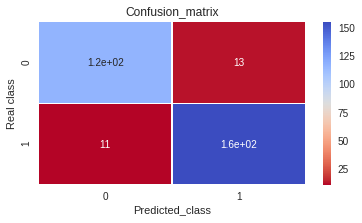


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.91      0.90      0.91       130
          1       0.92      0.93      0.93       166

avg / total       0.92      0.92      0.92       296

________________________________________________________________________________________________________
the undersample data for 2 proportion

the normal transacation proportion is : 0.6666666666666666
the fraud transacation proportion is : 0.3333333333333333
total number of record in resampled data is: 1476
------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443

the recall for this model is : 0.923076923077
TP 120
TN 302
FP 11
FN 10


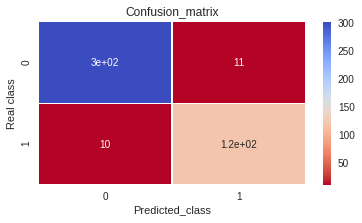


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.96      0.97       313
          1       0.92      0.92      0.92       130

avg / total       0.95      0.95      0.95       443

________________________________________________________________________________________________________
the undersample data for 3 proportion

the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968
------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591

the recall for this model is : 0.858974358974
TP 134
TN 428
FP 7
FN 22


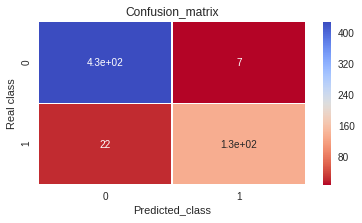


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       435
          1       0.95      0.86      0.90       156

avg / total       0.95      0.95      0.95       591

________________________________________________________________________________________________________


In [15]:
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    print()
    clf= SVC()# here we are just changing classifier
    model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")
    

1. Here recall and precision are approximately equal to Logistic Regression 

2. Lets try for whole data

the undersample data for 1 proportion

the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984
------------------------------------------------------------

the model classification for 1 proportion

length of training data
688
length of test data
296
length of training data
199364
length of test data
85443

the recall for this model is : 0.941176470588
TP 128
TN 81207
FP 4100
FN 8


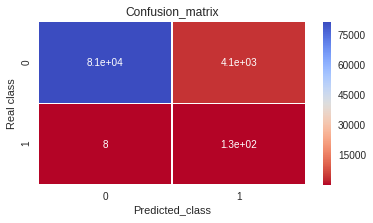


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.95      0.98     85307
          1       0.03      0.94      0.06       136

avg / total       1.00      0.95      0.97     85443

_________________________________________________________________________________________
the undersample data for 2 proportion

the normal transacation proportion is : 0.6666666666666666
the fraud transacation proportion is : 0.3333333333333333
total number of record in resampled data is: 1476
------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443
length of training data
199364
length of test data
85443

the recall for this model is : 0.922580645161
TP 143
TN 82552
FP 2736
FN 12


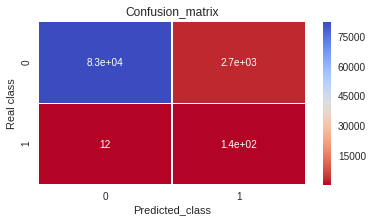


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     85288
          1       0.05      0.92      0.09       155

avg / total       1.00      0.97      0.98     85443

_________________________________________________________________________________________
the undersample data for 3 proportion

the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968
------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591
length of training data
199364
length of test data
85443

the recall for this model is : 0.888888888889
TP 136
TN 83261
FP 2029
FN 17


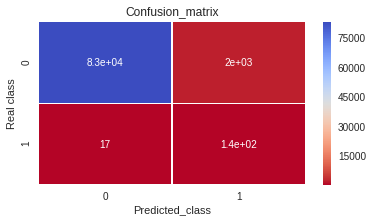


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85290
          1       0.06      0.89      0.12       153

avg / total       1.00      0.98      0.99     85443

_________________________________________________________________________________________


In [16]:
#let us train this model using undersample data and test for the whole data test set 
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(data) 
    #the partion for whole data
    print()
    clf=SVC()
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    # here training for the undersample data but tatsing for whole data
    print("_________________________________________________________________________________________")

1. A better recall but precision is not improving much 

2 .so to improve precision we must have to tune the  hyper parameter of these models

3 That I will do in next version 

4 For now lets try with my favorite Random Forest classifier 

the undersample data for 1 proportion

the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984
------------------------------------------------------------

the model classification for 1 proportion

length of training data
688
length of test data
296

the recall for this model is : 0.858064516129
TP 133
TN 139
FP 2
FN 22


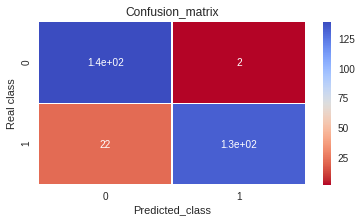


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.86      0.99      0.92       141
          1       0.99      0.86      0.92       155

avg / total       0.93      0.92      0.92       296

________________________________________________________________________________________________________
the undersample data for 2 proportion

the normal transacation proportion is : 0.6666666666666666
the fraud transacation proportion is : 0.3333333333333333
total number of record in resampled data is: 1476
------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443

the recall for this model is : 0.890410958904
TP 130
TN 294
FP 3
FN 16


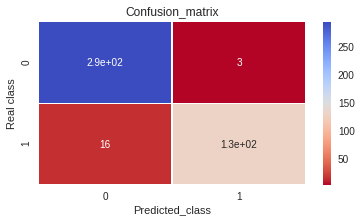


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       297
          1       0.98      0.89      0.93       146

avg / total       0.96      0.96      0.96       443

________________________________________________________________________________________________________
the undersample data for 3 proportion

the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968
------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591

the recall for this model is : 0.863636363636
TP 133
TN 436
FP 1
FN 21


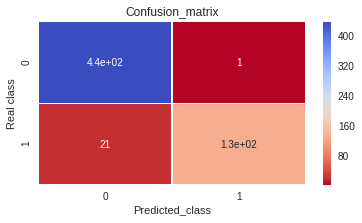


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.95      1.00      0.98       437
          1       0.99      0.86      0.92       154

avg / total       0.96      0.96      0.96       591

________________________________________________________________________________________________________


In [17]:
# Random Forest Classifier with undersample data only
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    print()
    clf= RandomForestClassifier(n_estimators=100)# here we are just changing classifier
    model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")
    

the undersample data for 1 proportion

the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984
------------------------------------------------------------

the model classification for 1 proportion

length of training data
688
length of test data
296
length of training data
199364
length of test data
85443

the recall for this model is : 0.971631205674
TP 137
TN 83064
FP 2238
FN 4


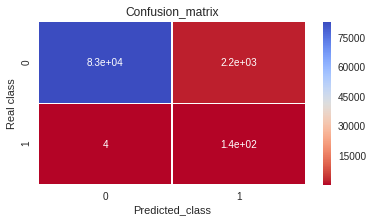


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85302
          1       0.06      0.97      0.11       141

avg / total       1.00      0.97      0.99     85443

_________________________________________________________________________________________
the undersample data for 2 proportion

the normal transacation proportion is : 0.6666666666666666
the fraud transacation proportion is : 0.3333333333333333
total number of record in resampled data is: 1476
------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443
length of training data
199364
length of test data
85443

the recall for this model is : 0.967320261438
TP 148
TN 84448
FP 842
FN 5


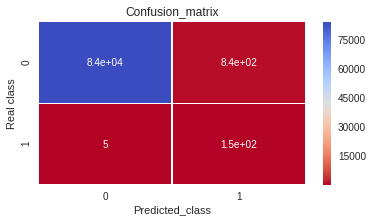


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85290
          1       0.15      0.97      0.26       153

avg / total       1.00      0.99      0.99     85443

_________________________________________________________________________________________
the undersample data for 3 proportion

the normal transacation proportion is : 0.75
the fraud transacation proportion is : 0.25
total number of record in resampled data is: 1968
------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591
length of training data
199364
length of test data
85443

the recall for this model is : 0.967948717949
TP 151
TN 84964
FP 323
FN 5


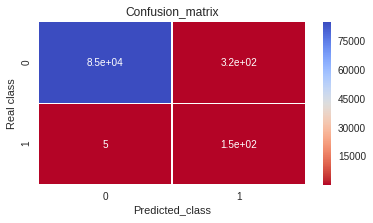


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85287
          1       0.32      0.97      0.48       156

avg / total       1.00      1.00      1.00     85443

_________________________________________________________________________________________


In [18]:
#let us train this model using undersample data and test for the whole data test set 
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(data) 
    #the partion for whole data
    print()
    clf=RandomForestClassifier(n_estimators=100)
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    # here training for the undersample data but tatsing for whole data
    print("_________________________________________________________________________________________")

1. for the third proportion the precision is 0.33 which is better than others

2. Lets try to get only import features using  Random Forest Classifier 

3. After it i will do analysis only for one portion that is 0.5 %

In [19]:
featimp = pd.Series(clf.feature_importances_,index=data_features_train.columns).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features use

V14                  0.206364
V10                  0.134424
V11                  0.098375
V12                  0.097194
V17                  0.088706
V4                   0.075658
V3                   0.071006
V16                  0.034599
V2                   0.020407
V18                  0.019018
V7                   0.017165
V21                  0.014312
V27                  0.011712
V19                  0.011044
V8                   0.010244
V1                   0.008564
Normalized Amount    0.007908
V9                   0.007183
V20                  0.007094
V15                  0.006852
V26                  0.006653
V5                   0.006597
V22                  0.006507
V13                  0.005839
V24                  0.005519
V28                  0.005390
V6                   0.005303
V25                  0.005210
V23                  0.005154
dtype: float64


1.  we can see this is showing the importance of feature for the making decision 

2. V14 is having a very good importance compare to other features

3. Lets use only top 5 (V14,V10,V12,V17,V4) feature to predict using Random forest classifier only for 0.5 % 

In [20]:
# make a new data with only class and V14
data1=data[["V14","V10","V12","V17","V4","Class"]]
data1.head()

,V14,V10,V12,V17,V4,Class
0,-0.311169,0.090794,-0.617801,0.207971,1.378155,0
1,-0.143772,-0.166974,1.065235,-0.114805,0.448154,0
2,-0.165946,0.207643,0.066084,1.109969,0.379780,0
3,-0.287924,-0.054952,0.178228,-0.684093,-0.863291,0
4,-1.119670,0.753074,0.538196,-0.237033,0.403034,0


In [21]:
Undersample_data1 = undersample(normal_indices,fraud_indices,1)
#only for 50 % proportion it means normal transaction and fraud transaction are equal so passing 
Undersample_data1_features_train,Undersample_data1_features_test,Undersample_data1_labels_train,Undersample_data1_labels_test = data_prepration(Undersample_data1)

the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 984
length of training data
688
length of test data
296


the recall for this model is : 0.93006993007
TP 133
TN 149
FP 4
FN 10


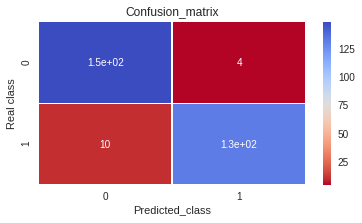


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.97      0.96       153
          1       0.97      0.93      0.95       143

avg / total       0.95      0.95      0.95       296



In [22]:
clf= RandomForestClassifier(n_estimators=100)
model(clf,Undersample_data1_features_train,Undersample_data1_features_test,Undersample_data1_labels_train,Undersample_data1_labels_test)

###Over Sampling

 1. In my previous version I got the 100 recall and 98 % precision by using Random forest with the over sampled data but in real it was due to over fitting because i was taking whole fraud data and was training for that and I was doing the testing on the same data.

 2. Please find link of previous version for more understanding [Link](https://www.kaggle.com/gargmanish/d/dalpozz/creditcardfraud/fraud-detection-100-recall-98-precision/run/1033018)

3. Thanks to Mr. Dominik Stuerzer for help 

In [23]:
# now we will divied our data sets into two part and we will train and test and will oversample the train data and predict for test data
# lets import data again
data = pd.read_csv("../input/creditcard.csv",header = 0)
print("length of training data",len(data))
print("length of normal data",len(data[data["Class"]==0]))
print("length of fraud  data",len(data[data["Class"]==1]))

length of training data 284807
length of normal data 284315
length of fraud  data 492


In [24]:
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(data)
data_train_X.columns
data_train_y.columns

length of training data
199364
length of test data
85443


Index(['Class'], dtype='object')

In [25]:
# ok Now we have a traing data
data_train_X["Class"]= data_train_y["Class"] # combining class with original data
data_train = data_train_X.copy() # for naming conevntion
print("length of training data",len(data_train))
# Now make data set of normal transction from train data
normal_data = data_train[data_train["Class"]==0]
print("length of normal data",len(normal_data))
fraud_data = data_train[data_train["Class"]==1]
print("length of fraud data",len(fraud_data))

length of training data 199364
length of normal data 199009
length of fraud data 355


In [26]:
# Now start oversamoling of training data 
# means we will duplicate many times the value of fraud data
for i in range (365): # the number is choosen by myself on basis of nnumber of fraud transaction
    normal_data= normal_data.append(fraud_data)
os_data = normal_data.copy() 
print("length of oversampled data is ",len(os_data))
print("Number of normal transcation in oversampled data",len(os_data[os_data["Class"]==0]))
print("No.of fraud transcation",len(os_data[os_data["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data[os_data["Class"]==0])/len(os_data))
print("Proportion of fraud data in oversampled data is ",len(os_data[os_data["Class"]==1])/len(os_data))

length of oversampled data is  328584
Number of normal transcation in oversampled data 199009
No.of fraud transcation 129575
Proportion of Normal data in oversampled data is  0.6056563922771651
Proportion of fraud data in oversampled data is  0.39434360772283494


 1. The proportion now becomes the 60 % and 40 % that is good now

In [27]:
# before applying any model standerdize our data amount 
os_data["Normalized Amount"] = StandardScaler().fit_transform(os_data['Amount'].reshape(-1, 1))
os_data.drop(["Time","Amount"],axis=1,inplace=True)
os_data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
82656,1.356574,-1.535896,1.014585,-0.980949,-1.840651,0.495094,-1.535552,0.235415,-0.847601,1.180545,...,-0.578444,-0.948479,0.038288,-0.051798,0.350549,-0.338308,0.073518,0.017247,0,-0.240655
202761,0.078384,0.693709,-0.282273,-1.007720,1.058216,-0.035670,0.838345,0.070423,-0.094317,-0.221217,...,-0.303203,-0.775385,-0.086534,-1.414806,-0.360046,0.208073,0.234031,0.072388,0,-0.371265
85985,-3.549282,-3.403880,2.389801,1.080311,1.683676,-1.100104,-0.699287,0.171644,0.935805,-0.256182,...,-0.284722,0.428109,2.844650,0.006528,0.466552,0.421108,0.260494,-0.472237,0,-0.383217
215180,2.084961,0.009129,-3.842413,-0.551511,3.139773,2.743495,0.130580,0.552759,-0.030368,-0.295843,...,0.034740,0.187883,-0.014668,0.682901,0.410981,0.734260,-0.081080,-0.064606,0,-0.374769
75855,1.193268,-0.071682,0.611175,-0.232721,-0.478724,-0.216029,-0.329775,0.071921,0.009225,-0.112748,...,-0.043944,-0.080370,0.101692,0.090155,0.041104,0.914386,-0.053130,-0.002135,0,-0.388278


length of training data
230008
length of test data
98576
the recall for this model is : 1.0
TP 38975
TN 59596
FP 5
FN 0


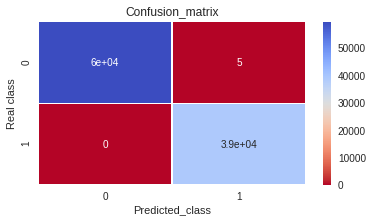


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     59601
          1       1.00      1.00      1.00     38975

avg / total       1.00      1.00      1.00     98576



In [28]:
# Now use this oversampled data for trainig the model and predict value for the test data that we created before
# now let us try within the the oversampled data itself
# for that we need to split our oversampled data into train and test
# so call our function data Prepration with oversampled data
os_train_X,os_test_X,os_train_y,os_test_y=data_prepration(os_data)
clf= RandomForestClassifier(n_estimators=100)
model(clf,os_train_X,os_test_X,os_train_y,os_test_y)

**Observations**

 1. As it have too many sample of  same fraud data so may be the all which are present in train data are present in test data also so we can say it is over fitting 
 2. So lets try with test data that one which we created in starting of oversampling segment no fraud transaction from that data have been repeated here
 3. Lets try

 

In [29]:
# now take all over sampled data as trainging and test it for test data
os_data_X = os_data.ix[:,os_data.columns != "Class"]
os_data_y = os_data.ix[:,os_data.columns == "Class"]
#for that we have to standrdize the normal amount and drop the time from it
data_test_X["Normalized Amount"] = StandardScaler().fit_transform(data_test_X['Amount'].reshape(-1, 1))
data_test_X.drop(["Time","Amount"],axis=1,inplace=True)
data_test_X.head()



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized Amount
11514,1.451038,-0.603389,0.007125,-0.616909,-0.260790,0.474328,-0.826944,0.042607,1.101926,0.110945,...,-0.054708,-0.249080,-0.389480,-0.151185,-1.380077,0.610950,-0.163068,-0.005513,-0.013058,-0.320476
162269,-6.697569,4.179960,-4.866476,-0.626586,-3.024024,-1.324855,-0.835983,2.692196,1.844012,2.825418,...,0.649757,0.035932,0.852066,0.245004,1.155756,0.098178,-0.214949,0.996161,1.252345,0.050478
158202,2.104037,0.065442,-1.428655,0.323540,0.393572,-0.720375,0.054806,-0.347347,2.082360,-0.464191,...,-0.271997,0.093486,0.657963,-0.007259,0.431328,0.360900,-0.474799,-0.024631,-0.056532,-0.357576
203014,-2.602873,-1.593223,0.029747,-3.264885,1.156256,0.930955,-0.477817,0.828043,-0.543710,-0.592860,...,-1.154639,-0.680829,-1.305820,0.841971,-1.009959,-0.495993,0.056765,-0.434924,0.375225,-0.176200
129141,-1.325968,1.418993,-0.531978,-1.422122,2.635501,3.223994,0.477654,0.538505,0.756693,1.527077,...,0.941600,-0.599390,-1.053070,-0.004289,0.917391,0.221693,0.059054,0.459664,-0.018905,-0.324681


the recall for this model is : 0.773722627737
TP 106
TN 85300
FP 6
FN 31


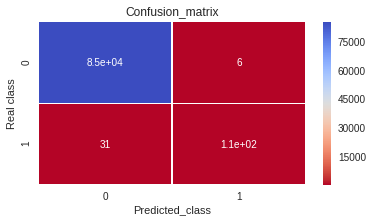


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85306
          1       0.95      0.77      0.85       137

avg / total       1.00      1.00      1.00     85443



In [30]:
# now use it for modeling
clf= RandomForestClassifier(n_estimators=100)
model(clf,os_data_X,data_test_X,os_data_y,data_test_y)

**Observations**

 1. Now here we can see recall decrease to only 83 % which is not bad  but not good also
 2. The precision is 0.93 which is good 
 3. from these observation we can say that the oversampling is better than the Under sampling because on Under sampling we were loosing a large amount of data or we can say a good amount of information so why the there precision was very low 

###SMOTE

In [31]:
# Lets Use SMOTE for Sampling
# As I mentioned it is also a type of oversampling but in this the data is not replicated but they are created 
#lets start with importing libraries
from imblearn.over_sampling import SMOTE
data = pd.read_csv('../input/creditcard.csv')

In [32]:
os = SMOTE(random_state=0) #   We are using SMOTE as the function for oversampling
# now we can devided our data into training and test data
# Call our method data prepration on our dataset
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(data)
columns = data_train_X.columns


length of training data
199364
length of test data
85443


In [33]:
# now use SMOTE to oversample our train data which have features data_train_X and labels in data_train_y
os_data_X,os_data_y=os.fit_sample(data_train_X,data_train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Class"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of normal transcation in oversampled data",len(os_data_y[os_data_y["Class"]==0]))
print("No.of fraud transcation",len(os_data_y[os_data_y["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data_y[os_data_y["Class"]==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y["Class"]==1])/len(os_data_X))

length of oversampled data is  398078
Number of normal transcation in oversampled data 199039
No.of fraud transcation 199039
Proportion of Normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


 1. By using Smote we are getting a 50 - 50 each

 2. No need of checking here in over sampled data itself from previous we know it will be overfitting

 3. let us check with the test data direct


In [34]:
# Let us first do our amount normalised and other that we are doing above
os_data_X["Normalized Amount"] = StandardScaler().fit_transform(os_data_X['Amount'].reshape(-1, 1))
os_data_X.drop(["Time","Amount"],axis=1,inplace=True)
data_test_X["Normalized Amount"] = StandardScaler().fit_transform(data_test_X['Amount'].reshape(-1, 1))
data_test_X.drop(["Time","Amount"],axis=1,inplace=True)


the recall for this model is : 0.862275449102
TP 144
TN 85253
FP 23
FN 23


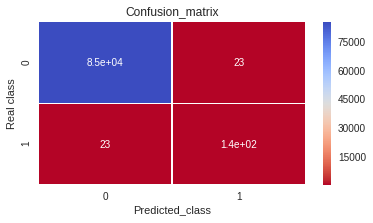


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85276
          1       0.86      0.86      0.86       167

avg / total       1.00      1.00      1.00     85443



In [35]:
# Now start modeling
clf= RandomForestClassifier(n_estimators=100)
# train data using oversampled data and predict for the test data
model(clf,os_data_X,data_test_X,os_data_y,data_test_y)

**observation **

 1. The recall is nearby the previous one done by over sampling 
 2. The precision decrease in this case